In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
water_one = pd.read_csv('Water V 1.txt',sep = " ")
water_two = pd.read_csv('Water V 2.txt',sep = " ")
water_three = pd.read_csv('Water V 3.txt',sep = " ")
water_four = pd.read_csv('Water V 4.txt',sep=" ")
die_water = pd.read_csv('Die Water V 1.txt',sep=" ")
paper_water_one = pd.read_csv('Water V Paper 1.txt',sep=" ")
paper_water_two = pd.read_csv('Water Paper V 2.txt',sep=" ")
syrup_125_1 = pd.read_csv('12.5 V 1.txt',sep=" ")
syrup_125_2 = pd.read_csv('12.5 V 2.txt',sep=" ")
syrup_125_3 = pd.read_csv('12.5 V 3.txt',sep=" ")
syrup_25_1 = pd.read_csv('25 V 1.txt',sep=" ")
syrup_25_2 = pd.read_csv('25 V 2.txt',sep=" ")
syrup_25_3 = pd.read_csv('25 V 3.txt',sep=" ")
syrup_50_1 = pd.read_csv('50 V 1.txt',sep=" ")
syrup_50_2 = pd.read_csv('50 V 2.txt',sep=" ")
syrup_50_3 = pd.read_csv('50 V 3.txt',sep=" ")

In [57]:
#Here is all of the tube test data

time_water = pd.DataFrame([0.366,0.381,0.368,0.367,0.380])
time_125 = pd.DataFrame([0.396,0.396,0.397,0.397,0.381])
time_25 = pd.DataFrame([0.426,0.442,0.456,0.442,0.458])
time_50 = pd.DataFrame([0.655,0.671,0.654,0.668,0.656])
full_tube_V = 0.014 #14 mL without ball
angle = 60 #60 degree angle
mass_ball = 0.0083645 #mass of ball in kg
dens_ball = 7890 #kg/m^3 density of ball
length_tube = 0.05 #length of tube is 0.05 m
dens_corn_syrup = 1400 #kg/m^3
dens_water = 1000 #kg/^3
dens_125 = (1400*0.125) + (1000*0.875)
dens_25 = (1400*0.25) + (1000*0.75)
dens_50 = (1400*0.5) + (1000*0.5)
r_ball = 0.006325 #radius in m

In [56]:
print(dens_125)

1050.0


In [75]:
def velocity(lst,empt_lst):
    for i in lst[0]:
        v = length_tube/i
        empt_lst.append(v)
    return empt_lst

def viscosity(lst,empt_lst,dens):
    lst_df = pd.DataFrame(lst)
    for i in lst_df[0]:
        visc = (2*(dens_ball - dens)*9.81*(r_ball**2)*(np.sin(np.deg2rad(60)))) / (i *9)
        empt_lst.append(visc)
    return empt_lst
    
vel_water = []
vel_125 = []
vel_25 = []
vel_50 = []

vis_water = []
vis_125 = []
vis_25 = []
vis_50 = []

vel_water = velocity(time_water,vel_water)
vel_125 = velocity(time_125,vel_125)
vel_25 = velocity(time_25,vel_25)
vel_50 = velocity(time_50,vel_50)

visc_water = viscosity(vel_water,vis_water,dens_water)
visc_125 = viscosity(vel_125,vis_125,dens_125)
visc_25 = viscosity(vel_25,vis_25,dens_25)
visc_50 = viscosity(vel_50,vis_50,dens_50)


In [78]:
print(vel_125)

[0.12626262626262627, 0.12626262626262627, 0.12594458438287154, 0.12594458438287154, 0.13123359580052493]


In [5]:
class clean:
    R = 0.05 #3 cm radius of cylinder
    a = 0.001 #1 mm radius hole on bottom
    #the above cannot be referenced in the child function for some
    #strange reason

    def __init__(self,df,columns): 
    
        self.df = df
        self.columns = columns #should be df.columns[2]
        self.time = []
        self.height = []
        self.time_predic = []
        self.height_predic = []
    
    def clean(self):
        for i in self.df.index:
            if (i%2 == 0):
                self.time.append(self.df[self.columns][i]/1000) #get to seconds 
            if (i%2 == 1):
                #scale linearly with y-intercept = 205, x = 155/175
                reverse = (self.df[self.columns][i] - 205) * (155/175) 
                #155 = max height, must reverse height data so that it goes down instead of up witht ime
                correct = 155 - reverse
                self.height.append(correct)
        return(self.time, self.height)
    
    def toricelli_height(self,R,a):
        for i in self.height:
            t = (R**2 / a**2) * ((2*(i/1000))/9.81)**(1/2)
            self.time_predic.append(t)
        return(np.array(self.time_predic))
    
    def toricelli_time(self,R,a):
        for i in self.time:
            h = (i * (a**2)/(R**2))**2 * (9.81/2)
            h_1 = h * 1000
            self.height_predic.append(h_1)
        return(np.array(self.height_predic))

water_1 = clean(water_one,water_one.columns[2]) #'208'
water_2 = clean(water_two,water_two.columns[2])
water_3 = clean(water_three,water_three.columns[2])
water_4 = clean(water_four,water_four.columns[2])
die_water_1 = clean(die_water,die_water.columns[2])
paper_water_1 = clean(paper_water_one,paper_water_one.columns[2])
paper_water_2 = clean(paper_water_two,paper_water_two.columns[2])
data_125_1 = clean(syrup_125_1,syrup_125_1.columns[2])
data_125_2 = clean(syrup_125_2,syrup_125_2.columns[2])
data_125_3 = clean(syrup_125_3,syrup_125_3.columns[2])
data_25_1 = clean(syrup_25_1,syrup_25_1.columns[2])
data_25_2 = clean(syrup_25_2,syrup_25_2.columns[2])
data_25_3 = clean(syrup_25_3,syrup_25_3.columns[2])
data_50_1 = clean(syrup_50_1,syrup_50_1.columns[2])
data_50_2 = clean(syrup_50_2,syrup_50_2.columns[2])
data_50_3 = clean(syrup_50_3,syrup_50_3.columns[2])

water_2.clean()
water_1.clean()
water_3.clean()
water_4.clean()
die_water_1.clean()
paper_water_1.clean()
paper_water_2.clean()
data_125_1.clean()
data_125_2.clean()
data_125_3.clean()
data_25_1.clean()
data_25_2.clean()
data_25_3.clean()
data_50_1.clean()
data_50_2.clean()
data_50_3.clean()

R = 0.025
a = 0.001

water_2_height_prediction = water_2.toricelli_height(R,a)
water_1_height_prediction = water_1.toricelli_height(R,a)
water_3_height_prediction = water_3.toricelli_height(R,a)
water_4_height_prediction = water_4.toricelli_height(R,a)
die_water_1_height_prediction = die_water_1.toricelli_height(R,a)
paper_water_1_height_prediction = paper_water_1.toricelli_height(R,a)
paper_water_2_height_predition = paper_water_2.toricelli_height(R,a)

water_2_time_prediction = water_2.toricelli_time(R,a)
water_1_time_prediction = water_1.toricelli_time(R,a)
water_3_time_prediction = water_3.toricelli_time(R,a)
water_4_time_prediction = water_4.toricelli_time(R,a)
die_water_1_time_prediction = die_water_1.toricelli_time(R,a)
paper_water_1_time_prediction = paper_water_1.toricelli_time(R,a)
paper_water_2_time_prediction = paper_water_2.toricelli_time(R,a)

<ipython-input-5-99ac9c0bc3bb>:28: RuntimeWarning: invalid value encountered in double_scalars
  t = (R**2 / a**2) * ((2*(i/1000))/9.81)**(1/2)


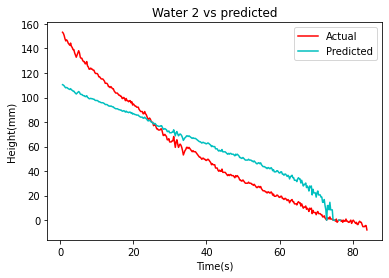

In [111]:


plt.plot(water_2.time[:-1],water_2.height,'r-',label='Actual')
plt.xlabel('Time(s)')
plt.ylabel('Height(mm)')
plt.plot(water_2.time[:-1],water_2_height_prediction,'c-',label='Predicted')
plt.title('Water 2 vs predicted')
plt.legend()

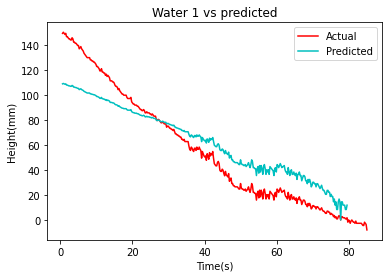

In [112]:
plt.plot(water_1.time[:-1],water_1.height,'r-',label='Actual')
plt.xlabel('Time(s)')
plt.ylabel('Height(mm)')
plt.plot(water_1.time[:-1],water_1_height_prediction,'c-',label='Predicted')
plt.title('Water 1 vs predicted')
plt.legend()

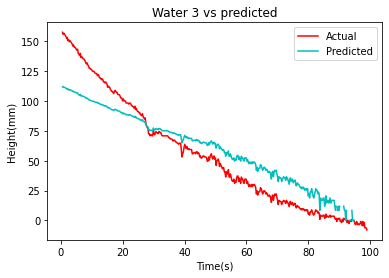

In [113]:
plt.plot(water_3.time[:-1],water_3.height,'r-',label='Actual')
plt.xlabel('Time(s)')
plt.ylabel('Height(mm)')
plt.plot(water_3.time[:-1],water_3_height_prediction,'c-',label='Predicted')
plt.title('Water 3 vs predicted')
plt.legend()

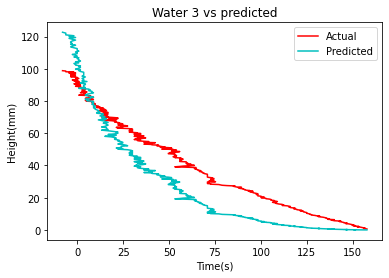

In [114]:
plt.plot(water_3.height,water_3.time[:-1],'r-',label='Actual')
plt.xlabel('Time(s)')
plt.ylabel('Height(mm)')
plt.plot(water_3.height,water_3_time_prediction[:-1],'c-',label='Predicted')
plt.title('Water 3 vs predicted')
plt.legend()

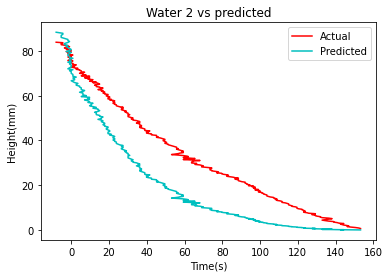

In [115]:
plt.plot(water_2.height,water_2.time[:-1],'r-',label='Actual')
plt.xlabel('Time(s)')
plt.ylabel('Height(mm)')
plt.plot(water_2.height,water_2_time_prediction[:-1],'c-',label='Predicted')
plt.title('Water 2 vs predicted')
plt.legend()

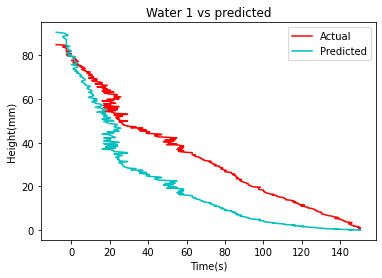

In [116]:
plt.plot(water_1.height,water_1.time[:-1],'r-',label='Actual')
plt.xlabel('Time(s)')
plt.ylabel('Height(mm)')
plt.plot(water_1.height,water_1_time_prediction[:-1],'c-',label='Predicted')
plt.title('Water 1 vs predicted')
plt.legend()

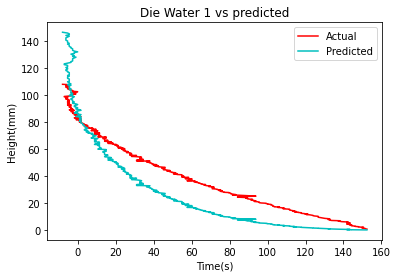

In [117]:
plt.plot(die_water_1.height,die_water_1.time[:-1],'r-',label='Actual')
plt.xlabel('Time(s)')
plt.ylabel('Height(mm)')
plt.plot(die_water_1.height,die_water_1_time_prediction[:-1],'c-',label='Predicted')
plt.title('Die Water 1 vs predicted')
plt.legend()

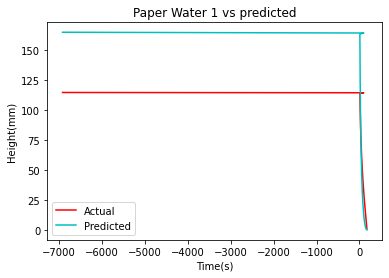

In [118]:
plt.plot(paper_water_1.height,paper_water_1.time[:-1],'r-',label='Actual')
plt.xlabel('Time(s)')
plt.ylabel('Height(mm)')
plt.plot(paper_water_1.height,paper_water_1_time_prediction[:-1],'c-',label='Predicted')
plt.title('Paper Water 1 vs predicted')
plt.legend()

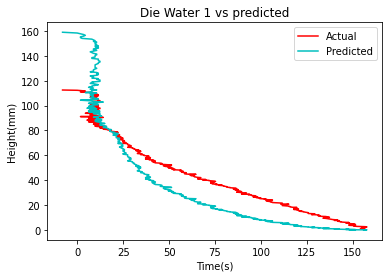

In [119]:
plt.plot(paper_water_2.height,paper_water_2.time[:-1],'r-',label='Actual')
plt.xlabel('Time(s)')
plt.ylabel('Height(mm)')
plt.plot(paper_water_2.height,paper_water_2_time_prediction[:-1],'c-',label='Predicted')
plt.title('Die Water 1 vs predicted')
plt.legend()

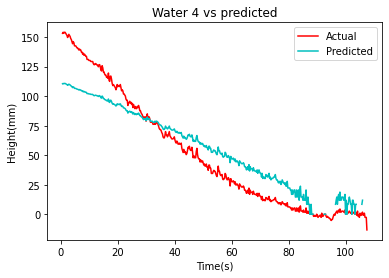

In [120]:
plt.plot(water_4.time[:-1],water_4.height,'r-',label='Actual')
plt.xlabel('Time(s)')
plt.ylabel('Height(mm)')
plt.plot(water_4.time[:-1],water_4_height_prediction,'c-',label='Predicted')
plt.title('Water 4 vs predicted')
plt.legend()

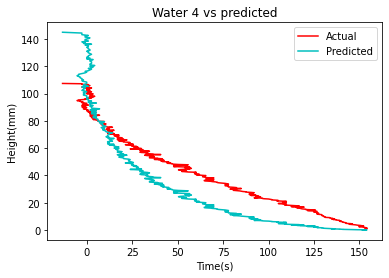

In [121]:
plt.plot(water_4.height,water_4.time[:-1],'r-',label='Actual')
plt.xlabel('Time(s)')
plt.ylabel('Height(mm)')
plt.plot(water_4.height,water_4_time_prediction[:-1],'c-',label='Predicted')
plt.title('Water 4 vs predicted')
plt.legend()

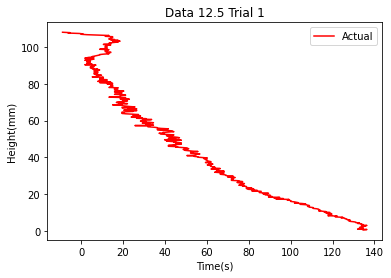

In [7]:
plt.plot(data_125_1.height,data_125_1.time[:-1],'r-',label='Actual')
plt.xlabel('Time(s)')
plt.ylabel('Height(mm)')
#plt.plot(data_125_1.height,water_4_time_prediction[:-1],'c-',label='Predicted')
plt.title('Data 12.5 Trial 1')
plt.legend()

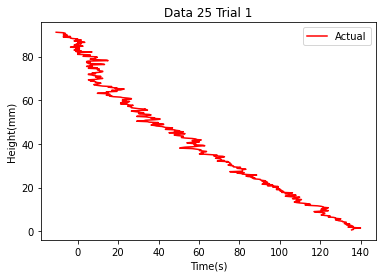

In [8]:
plt.plot(data_25_1.height,data_25_1.time[:-1],'r-',label='Actual')
plt.xlabel('Time(s)')
plt.ylabel('Height(mm)')
#plt.plot(data_125_1.height,water_4_time_prediction[:-1],'c-',label='Predicted')
plt.title('Data 25 Trial 1')
plt.legend()

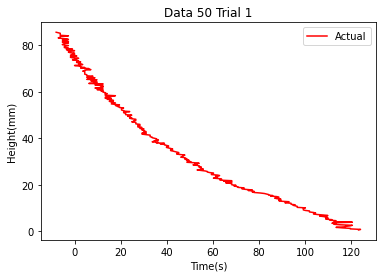

In [9]:
plt.plot(data_50_1.height,data_50_1.time[:-1],'r-',label='Actual')
plt.xlabel('Time(s)')
plt.ylabel('Height(mm)')
#plt.plot(data_125_1.height,water_4_time_prediction[:-1],'c-',label='Predicted')
plt.title('Data 50 Trial 1')
plt.legend()